In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#load some data in a pandas dataframe

df = None
#df = pd.read_csv("C:/Users/.../Oilanalysis.csv") #for those who would like to work from a local drive
df = pd.read_csv("https://raw.githubusercontent.com/chrisrijsdijk/RAMS/master/data/Oilanalysis.csv", sep=";")

In [20]:
# check the datatypes in the dataframe to verify that all columns except for "Age" are numerical

#df.dtypes

In [21]:
# get a preview on the data

#df.head(3)
#df.describe()
#len(df["BRSTVD"])

In [22]:
# plot histograms of the data in the dataframe
# causal effects of the columns that just contain one value remain invisible "ceteris paribus"
# check for outliers and explain them eventually

#for col in df.columns: 
#    try:      
#        df[col] = pd.to_numeric(df[col]) 
#        df.hist(column=col)
#    except ValueError:
#        print("The column "+col+' can not be represented as a histogram')

In [23]:
#create a correlation matrix to check for pairwise linear dependencies among the columns

#dummy=df.iloc[:,1:]    #remove the "Age" column that is not numerical
#dummy.corr(min_periods=15)
#plt.matshow(dummy.corr(min_periods=15))
#plt.show()
#print(dummy.columns)

#del dummy

In [24]:
#perform k-means clustering to check for nonlinear dependencies among the df columns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer


In [25]:
#dispose first column of the dataframe because it is not numerical

X=df.iloc[:,1:]


In [26]:
#impute data in case of NaN's by using K nearest neighbour

imputer = KNNImputer(n_neighbors=20, weights="distance")
X=imputer.fit_transform(X)


In [27]:
#transpose the dataframe while disposing the first non-numerical column

scaler=StandardScaler()

X = scaler.fit_transform(X)
#print(scaler.mean_)


In [28]:
#prepare an elbow plot to visually determine a feasible number of clusters

inertia = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertia.append(kmeanModel.inertia_)


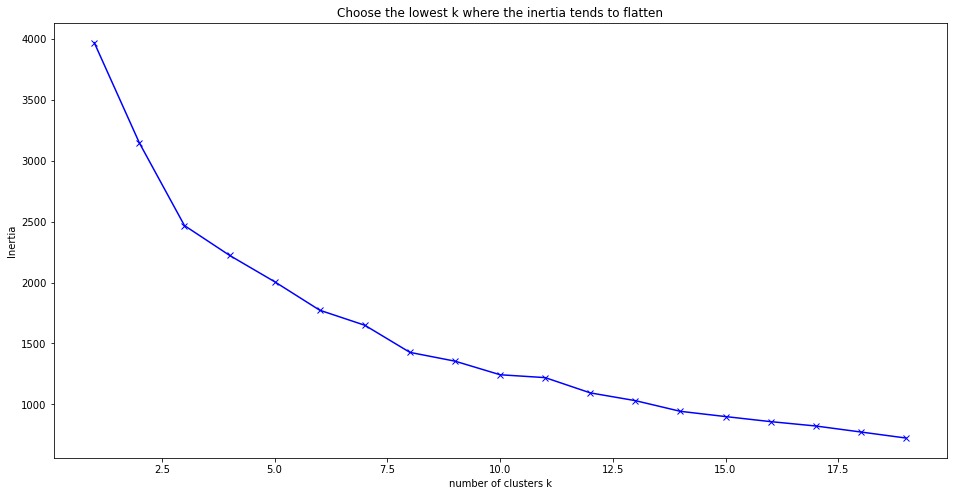

In [29]:
#create the elbow plot

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('number of clusters k')
plt.ylabel('Inertia')
plt.title('Choose the lowest k where the inertia tends to flatten')
plt.show()


In [32]:
# perform the k-means clustering while filling the preferred number of clusters in the first line

#the number of clusters k is:
k=3

kmeanModel = KMeans(n_clusters=k)
kmeanModel.fit(X)
kmeanModel.predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [33]:
# display some properties of the clustering as one whishes to

#kmeanModel.inertia_
#kmeanModel.labels_
#kmeanModel.n_iter_
#kmeanModel.cluster_centers_

In [35]:
# create a dataframe of the clustercenters

dfclustercenters=pd.DataFrame(kmeanModel.cluster_centers_, columns=df.columns[1:])
dfclustercenters


,BRSTVD,ISO 4406 large,ISO 4406 medium,ISO 4406 small,LNF-ROET,LNF-CUT,LNF-FIB,LNF-FW,LNF-NMW,LNF-SSW,...,SI,SN,ZN,LI,TAN,TBN,VIS40,VIS99,VLAMCC,WATER
0,0.479575,0.283159,0.139503,0.134280,0.290356,-0.068726,0.048540,-0.083786,-0.079455,-0.080306,...,0.023910,0.158181,-1.055225,0.0,-0.266556,-0.773285,-0.795524,-0.969989,-0.458317,-0.140754
1,-0.277370,-0.201110,-0.135693,-0.107678,-0.188907,-0.098733,-0.144852,-0.089307,-0.093544,-0.092383,...,-0.043799,-0.088736,0.611106,0.0,0.147270,0.454575,0.445430,0.553248,0.262631,0.008258
2,0.406554,3.264593,4.573998,2.545010,1.945100,11.158806,9.500171,11.088012,11.231963,11.177106,...,2.447899,-0.088736,-0.959214,0.0,0.332725,-1.249486,0.514238,-0.193582,-0.190482,5.805793


In [37]:
# add the clusterlabels to the dataframe of samples

df["clusterlabels"]=kmeanModel.labels_
df=df.sort_values("clusterlabels")
df.describe()

,BRSTVD,ISO 4406 large,ISO 4406 medium,ISO 4406 small,LNF-ROET,LNF-CUT,LNF-FIB,LNF-FW,LNF-NMW,LNF-SSW,...,SN,ZN,LI,TAN,TBN,VIS40,VIS99,VLAMCC,WATER,clusterlabels
count,125.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,...,128.000000,128.000000,128.0,127.000000,125.000000,128.000000,126.000000,124.000000,128.000000,128.000000
mean,3.946080,19.763780,16.165354,10.110236,0.184961,9.937008,2.456693,26.559055,68.362205,17.826772,...,1.007812,1408.593750,1.0,3.170866,10.797600,51.492109,10.276254,173.370968,0.078750,0.648438
std,3.342141,2.234139,1.946767,4.306194,0.178756,61.427690,5.892901,170.301910,577.163420,115.624673,...,0.088388,113.656025,0.0,0.387321,0.483346,3.822323,0.725565,13.180250,0.046904,0.495489
min,0.500000,15.000000,12.000000,1.000000,0.010000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1200.000000,1.0,2.400000,9.000000,41.300000,8.292000,134.000000,0.010000,0.000000
25%,1.300000,19.000000,15.000000,10.000000,0.065000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1300.000000,1.0,2.900000,10.500000,48.697500,9.766000,165.875000,0.060000,0.000000
50%,2.900000,20.000000,16.000000,11.000000,0.130000,1.000000,1.000000,3.000000,5.000000,1.000000,...,1.000000,1400.000000,1.0,3.200000,10.800000,51.710000,10.235000,173.500000,0.070000,1.000000
75%,5.500000,20.000000,17.000000,12.000000,0.265000,6.000000,1.000000,7.000000,12.000000,7.000000,...,1.000000,1500.000000,1.0,3.450000,11.100000,53.860000,10.767500,182.500000,0.080000,1.000000
max,13.500000,37.000000,25.000000,21.000000,1.050000,690.000000,58.000000,1900.000000,6500.000000,1300.000000,...,2.000000,1600.000000,1.0,4.300000,12.400000,59.370000,12.290000,206.000000,0.480000,2.000000


In [39]:
# save the dataframes

#dfclustercenters.to_csv("C:/Users/Chris/Pythonprojects/RAMS/notebook/clustercenters.csv")
#df.to_csv("C:/Users/Chris/Pythonprojects/RAMS/notebook/clusteredsamples.csv")
